In [1]:
import cv2 #opencv
import matplotlib.pyplot as plt #绘图展示
import numpy as np #数值计算

%matplotlib inline 

color = ("b", "g", "r")
imgStr = "sample07.jpg"

img = cv2.imread(imgStr)

In [2]:
def bgr2rbg(img):
    result = img.copy()
    result[:,:,0] = img[:,:,2]
    result[:,:,2] = img[:,:,0]
    return result

In [3]:
def pmf_bgr(img):
    for i, col in enumerate(color):
        hist, bins = np.histogram(img[:,:,i], 256, [0, 256])
        hist = hist/np.sum(hist)
        plt.plot(hist, color = col)
        plt.xlim([0, 256])

In [4]:
def cdf_bgr(img):
    for i, col in enumerate(color):
        hist, bins = np.histogram(img[:,:,i], 256, [0, 256])
        hist = hist/np.sum(hist)
        plt.plot(hist.cumsum(), color = col)
        plt.xlim([0, 256])

In [5]:
# pmf
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
pmf = hist/np.sum(hist)
# cdf
cdf = np.cumsum(pmf)
# f(I) or s_k
mapping = np.round(255*cdf).astype("uint8")
# transform
HE = mapping[img]

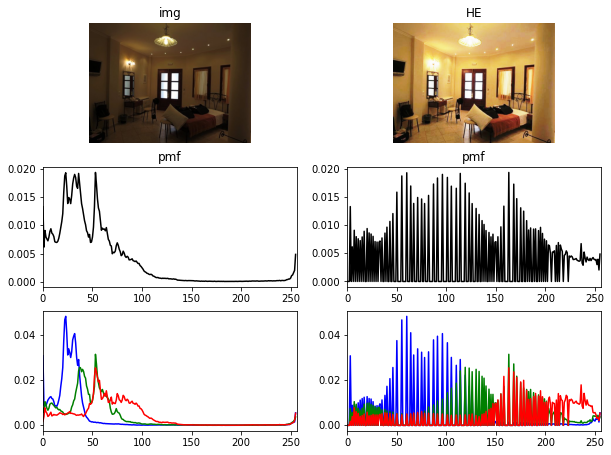

In [6]:
# display
plt.figure(figsize=(10,7.5))
plt.subplot(3,2,1)
plt.title("img")
plt.imshow(bgr2rbg(img))
plt.axis("off")
plt.subplot(3,2,2)
plt.title("HE")
plt.imshow(bgr2rbg(HE))
plt.axis("off")
plt.subplot(3,2,3)
plt.title("pmf")
plt.plot(pmf, color = "k")
plt.xlim([0, 256])
plt.subplot(3,2,4)
plt.title("pmf")
hist, bins = np.histogram(HE.flatten(), 256, [0, 256])
plt.plot(hist/np.sum(hist), color = "k")
plt.xlim([0, 256])
plt.subplot(3,2,5)
pmf_bgr(img)
#plt.plot(pmf, color = "k")
plt.subplot(3,2,6)
pmf_bgr(HE)
#plt.plot(hist/np.sum(hist), color = "k")
plt.show()

In [7]:
# #plot img
# plt.imshow(bgr2rbg(img))
# plt.show()
# #plot histogram
# histogram(img)
# plt.show()
# #plot cdf
# cdf(img)
# plt.show()
# # calculate cdf
# hist, bins = np.histogram(img.flatten(), 256, [0, 256])
# cdf = hist.cumsum()
# cdf_m = cdf * hist.max() / cdf.max()
# cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max() - cdf_m.min())
# cdf = np.ma.filled(cdf_m, 0).astype("uint8")

# # mapping
# img2 = cdf[img]
# plt.figure(figsize=(10,5))
# plt.subplot(2,2,1)
# plt.title("image")
# plt.imshow(bgr2rbg(img))
# plt.axis("off")
# plt.subplot(2,2,2)
# plt.title("he")
# plt.imshow(bgr2rbg(img2))
# plt.axis("off")
# plt.subplot(2,2,3)
# plt.title("image")
# histogram(img)
# plt.subplot(2,2,4)
# plt.title("he")
# histogram(img2)
# plt.show()